# **Handling Imbalanced Dataset**

Suppose if we have 1000 records, and in that target column there are 900 - 1's and 100 - 0's then the data is imbalanced

* If the data is imbalnced then we get bad results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
X = df.iloc[:,:-1]

In [7]:
y = df.iloc[:,-1]

In [8]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

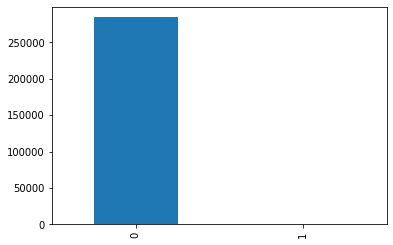

In [9]:
df.Class.value_counts().plot(kind = 'bar')

In [10]:
## You can also use below code to split X and y data

# X=df.drop("Class",axis=1)
# y=df.Class

# or 


# columns = data.columns.tolist()
# columns = [c for c in columns if c not in ["Class"]]
# target = "Class"

# state = np.random.RandomState(42)
# X = data[columns]
# y = data[target]

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# We can do under sampling or over sampling

## Under Sampling

In the under sampling we will try to reduce the large number points to small number points so that both will be equal

eg:

* In the dataset we have 900 - 1's and 100 - 0's
* Then in the output of under sampling we get 100 - 1's and 100 - 0's 

In [12]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()   # inside the NearMiss we can specify the ratio also
X_res,y_res = nm.fit_resample(X,y)

In [13]:
X_res.shape, y_res.shape

((984, 30), (984,))

In [14]:
y_res.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


## Over Sampling 

In the over sampling we will try to increase the small number points to large number points so that both will be equal

eg:

* In the dataset we have 900 - 1's and 100 - 0's
* Then in the output of under sampling we get 900 - 1's and 900 - 0's 

### Unsing SMOTE Tomek

In [16]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_sample(X,y)

In [17]:
X_res.shape, y_res.shape

((567562, 30), (567562,))

In [18]:
y_res.value_counts()

0    283781
1    283781
Name: Class, dtype: int64

In [19]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


### Using Over Sampler

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(0.5)
X_res, y_res = ros.fit_resample(X, y)

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [21]:
X_res.shape, y_res.shape

((426472, 30), (426472,))

In [22]:
y_res.value_counts()

0    284315
1    142157
Name: Class, dtype: int64

In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 142157})
